[1, 2, 3, 4, 5]
[(1, 2), (1, 5), (2, 3), (3, 4), (4, 5)]
1


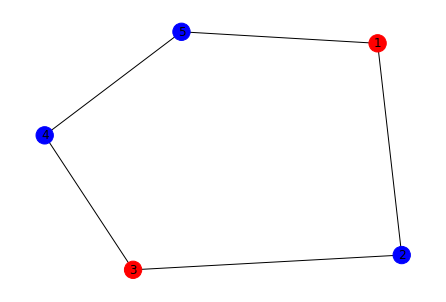

In [1]:
import networkx as nx

n = int(input("Enter no. of nodes "))

l = [i for i in range(1,n+1)]

print(l)

network = nx.Graph()

network.add_nodes_from(l)

for i in range(1,n):
    network.add_edge(i,i+1,weight=i)

network.add_edge(1,n,weight = n)

print(network.edges())

print(network.get_edge_data(1, 2)['weight'])

color_list = []

for i in network.edges():
    if network.get_edge_data(i[0],i[1])['weight'] < 3:
        color_list.append("red")
    else:
        color_list.append("blue")
    

nx.draw(network,node_color = color_list,with_labels = True)

In [2]:
x_capacity = int(input("Enter Jug 1 capacity:"))
y_capacity = int(input("Enter Jug 2 capacity:"))
end = int(input("Enter target volume:"))

def bfs(start, end, x_capacity, y_capacity):
	path = []
	front = []
	front.append(start)
	visited = []
	#visited.append(start)
	while(not (not front)):
		current = front.pop()
		x = current[0]
		y = current[1]
		path.append(current)
		if x == end or y == end:
			print("Found!")
			return path
		# rule 1
		if current[0] < x_capacity and ([x_capacity, current[1]] not in visited):
			front.append([x_capacity, current[1]])
			visited.append([x_capacity, current[1]])

		# rule 2
		if current[1] < y_capacity and ([current[0], y_capacity] not in visited):
			front.append([current[0], y_capacity])
			visited.append([current[0], y_capacity])

		# rule 3
		if current[0] > x_capacity and ([0, current[1]] not in visited):
			front.append([0, current[1]])
			visited.append([0, current[1]])

		# rule 4
		if current[1] > y_capacity and ([x_capacity, 0] not in visited):
			front.append([x_capacity, 0])
			visited.append([x_capacity, 0])

		# rule 5
		#(x, y) -> (min(x + y, x_capacity), max(0, x + y - x_capacity)) if y > 0
		if current[1] > 0 and ([min(x + y, x_capacity), max(0, x + y - x_capacity)] not in visited):
			front.append([min(x + y, x_capacity), max(0, x + y - x_capacity)])
			visited.append([min(x + y, x_capacity), max(0, x + y - x_capacity)])

		# rule 6
		# (x, y) -> (max(0, x + y - y_capacity), min(x + y, y_capacity)) if x > 0
		if current[0] > 0  and ([max(0, x + y - y_capacity), min(x + y, y_capacity)] not in visited):
			front.append([max(0, x + y - y_capacity), min(x + y, y_capacity)])
			visited.append([max(0, x + y - y_capacity), min(x + y, y_capacity)])

	return "Not found"

def gcd(a, b):
	if a == 0:
		return b
	return gcd(b%a, a)

# start state: x = 0 , y = 0
start = [0, 0] 
#end = 2
#x_capacity = 4
#y_capacity = 3

# condition for getting a solution:
# the target volume 'end' should be a multiple of gcd(a,b)

if end % gcd(x_capacity,y_capacity) == 0:
	print(bfs(start, end, x_capacity, y_capacity))
else:
	print("No solution possible for this combination.")

input()


Found!
[[0, 0], [0, 3], [2, 1]]


'1'